<a href="https://colab.research.google.com/github/1lamoyspencer/FDSFE_LSpencer/blob/main/HW8/NN101_MNISTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this homework is to create three neural network to solve the same problem and compare the performance of each. The problem is the classic prediction of hand written digits. We use the MNIST benchmark dataset which contains 60,000 images of handwritten digits and the corresponding labels

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
#download the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# how many labels are available?
y_train.shape

(60000,)

In [4]:
#what is the shape of the postage stamps that constitute the dataset?
x_train.shape

(60000, 28, 28)

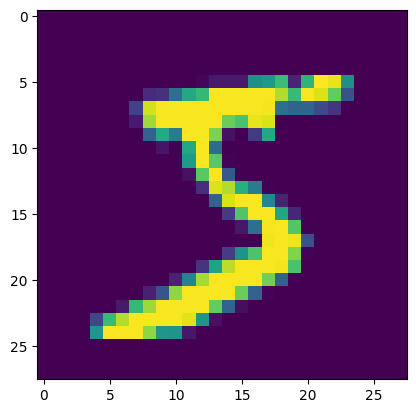

In [5]:
plt.imshow(x_train[0])

#YOUR CODE GOES HERE

In [6]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [7]:
print(x_train.min(), x_train.max(), x_train.dtype)

0 255 uint8


In [8]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [9]:
# the shape should have not changed
x_train.shape

(60000, 28, 28)

In [10]:
#the number of pixels in the data is
28*28

784

# Build the first Artificial Neural Network
solve the problem as a regression - see slides for the appropriate choices

- use dense layers
- choose the right number of neurons in output to solve a _regression_ problem
- choose the right activation function on the last layer for a _regression_ problem
- chose the right loss function for a _regression_ problem


In [11]:
# architecture hyperparametrs
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

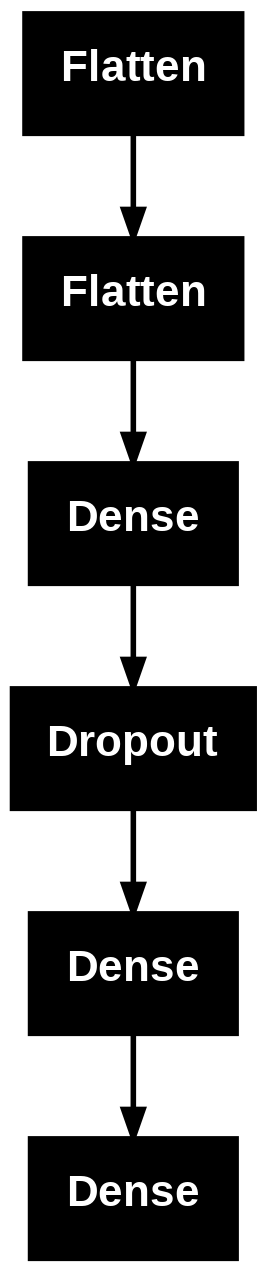

In [12]:
tf.keras.utils.plot_model(model)

In [13]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [14]:
# Define the EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
)

In [15]:
#train the model (did you make sure you are using GPUs??)
# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train the model and include the callback
training_history = model.fit(
    x_train,
    y_train,
    epochs=500,
    validation_split=0.1,
    callbacks=[callback]  # Pass the callback here
)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1383 - loss: 3.1703 - val_accuracy: 0.1368 - val_loss: 1.1629
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1475 - loss: 1.3898 - val_accuracy: 0.1472 - val_loss: 0.9486
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1490 - loss: 1.1622 - val_accuracy: 0.1678 - val_loss: 0.8158
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1495 - loss: 1.0671 - val_accuracy: 0.1628 - val_loss: 0.8268
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1504 - loss: 0.9897 - val_accuracy: 0.1597 - val_loss: 0.7701
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1503 - loss: 0.9409 - val_accuracy: 0.1708 - val_loss: 0.7195
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1514 - loss: 0.9234 - val_accuracy: 0.1630 - val_loss: 0.7348
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1533 - loss: 0

the training_history object contains the loss curves: training loss as `training_history.history["loss"]` and validation loss as `training_history.history["val_loss"]` (note the validation_split argument to model.fit set to 10%).

Show the training and validation losses and comment: is the model overfitting? at what epoch did it start to overfit?

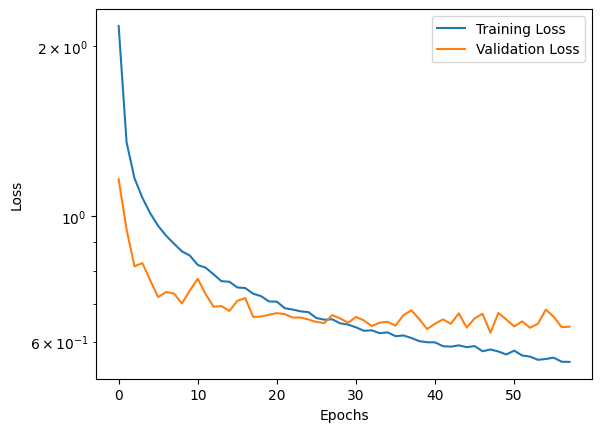

In [16]:
plt.plot(training_history.history["loss"], label="Training Loss")
plt.plot(training_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')  # use a log scale for the y-axis
plt.legend()
plt.show()

In [17]:
#check for overfitting
if training_history.history['loss'][-1] < training_history.history['val_loss'][-1]:
    print("Overfitting detected")
else:
    print("No overfitting detected")

Overfitting detected


The model is still overfitting despite early stopping, indicating that the stopping criteria isn't being triggered early enough. A way to detect overfitting is by analyzing the training and validation loss using the code I implemented above. If the training loss decreases while the validation loss begins to decline and then increase or plateau, it clearly indicates overfitting. To address this, I would increase the patience in early stopping, apply stronger regularization such as L2 (weight decay) to penalize large weights, and increase the dropout rate to prevent the model from relying too heavily on certain features. Additionally, reducing the model's complexity by decreasing the number of layers or neurons, along with augmenting the data to introduce more variability, would help improve generalization and prevent the model from memorizing the training data.

In [20]:
#what is the accuracy of the model? use model.evaluat to assess it
loss, accuracy = model.evaluate(x_test, y_test) # unpack the output into loss and accuracy
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1781 - loss: 0.7844
Accuracy: 0.1842000037431717


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


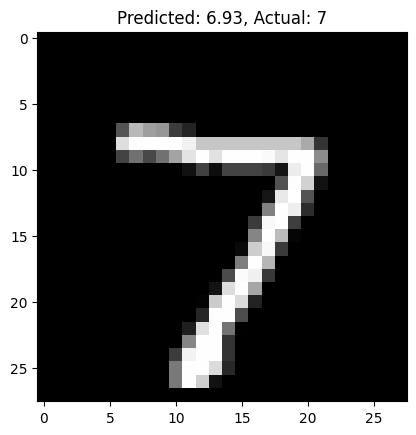

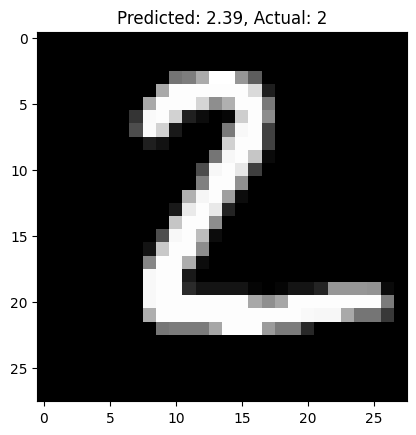

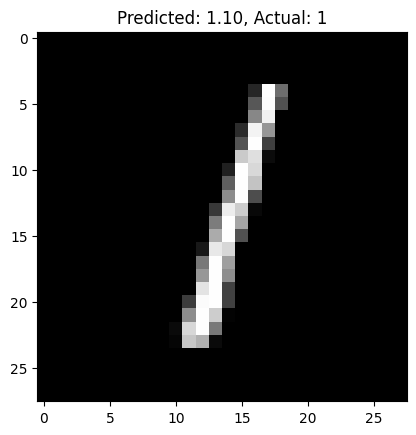

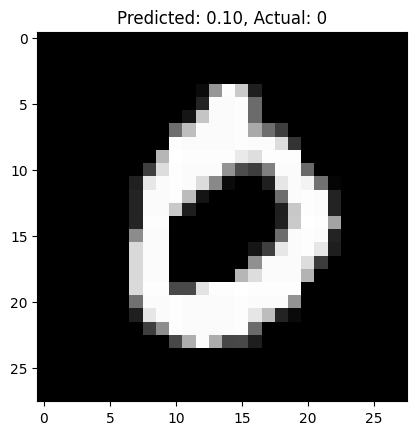

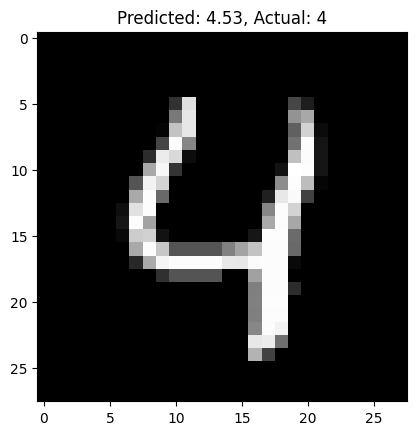

In [21]:
 #show the first 5 data points and corresponding predictions
predictions = model.predict(x_test[:5])

# Display the images and predictions
for i in range(5):
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test[i]}")  # Show predicted and actual labels
    plt.show()

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Build a ANN to solve the problem as a multiclass classification

see slides for the apprioriate choices
- use dense layers
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [23]:
# modify the architecture hyperparametrs
prob_model = tf.keras.models.Sequential()
# your code goes here
prob_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
prob_model.add(tf.keras.layers.Dense(128, activation='relu'))
prob_model.add(tf.keras.layers.Dropout(0.2))
prob_model.add(tf.keras.layers.Dense(10, activation='softmax'))
prob_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

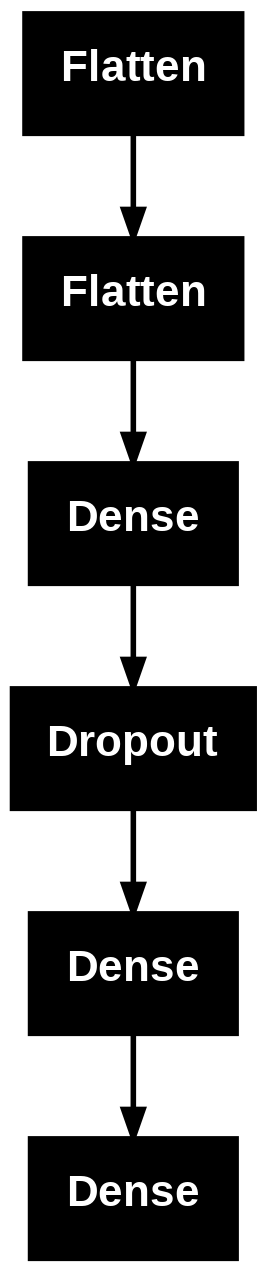

In [24]:
tf.keras.utils.plot_model(model)

In [25]:
# Set the loss function to SparseCategoricalCrossentropy
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# Set the optimizer to Adam
optimizer = tf.keras.optimizers.Adam()

# Compile the model
prob_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Define the EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
)

# Fit the model to the training data
prob_training_history = prob_model.fit(
    x_train,
    y_train,
    epochs=500,
    validation_split=0.1,
    callbacks=[callback]  # Pass the callback here
)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8521 - loss: 0.5018 - val_accuracy: 0.9658 - val_loss: 0.1244
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9520 - loss: 0.1584 - val_accuracy: 0.9738 - val_loss: 0.0902
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9654 - loss: 0.1149 - val_accuracy: 0.9767 - val_loss: 0.0786
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9714 - loss: 0.0903 - val_accuracy: 0.9788 - val_loss: 0.0741
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0757 - val_accuracy: 0.9820 - val_loss: 0.0640
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9786 - loss: 0.0671 - val_accuracy: 0.9810 - val_loss: 0.0667
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9816 - loss: 0.0565 - val_accuracy: 0.9817 - val_loss: 0.0647
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0

In [26]:
#what is the accuracy of the model? use model.evaluat to assess it
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1781 - loss: 0.7844
Accuracy: 0.1842000037431717


In [27]:
# show the first 10 data points and corresponding predictions

result = prob_model.predict(x_test[:10])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


array([[1.59559355e-09, 2.12060106e-10, 1.09896597e-07, 3.03451325e-05,
        6.48541576e-15, 2.20656364e-08, 4.93068043e-16, 9.99969006e-01,
        1.81596474e-10, 5.10348514e-07],
       [1.88276372e-09, 4.60378760e-05, 9.99948144e-01, 4.67029395e-06,
        2.19972339e-15, 2.74015886e-08, 1.63373437e-09, 4.47094076e-14,
        1.19532899e-06, 1.99424285e-13],
       [3.59864423e-08, 9.99309540e-01, 4.24945665e-06, 3.79135571e-07,
        3.48175599e-05, 5.87743330e-07, 6.91162813e-06, 1.74944929e-04,
        4.67263628e-04, 1.26144323e-06],
       [9.99792159e-01, 7.53800244e-10, 1.90244289e-04, 8.25730751e-07,
        8.31118086e-07, 1.20351604e-06, 1.83706209e-06, 1.55090305e-07,
        1.05141105e-07, 1.27205694e-05],
       [7.44346380e-07, 1.61475652e-10, 1.10702922e-06, 7.50444062e-09,
        9.96715665e-01, 1.10200093e-09, 6.24250163e-08, 5.07765290e-05,
        2.49990279e-07, 3.23131774e-03],
       [9.91389956e-11, 9.99498367e-01, 2.93138447e-09, 1.61964042e-08,
   

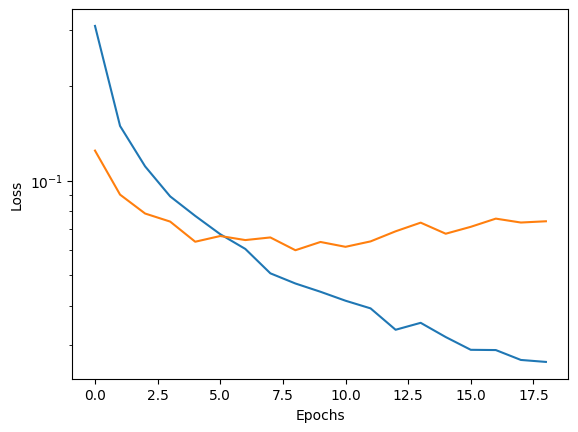

In [28]:
plt.plot(prob_training_history.history["loss"], label="Training Loss")
plt.plot(prob_training_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')  # use a log scale for the y-axis


The plot shows a clear sign of overfitting. The training loss continues to decrease steadily, while the validation loss starts increasing after a few epochs. This indicates that the model is becoming too specialized to the training data and failing to generalize to new data. To address this, techniques like regularization, early stopping, data augmentation, or model simplification can be employed.

# Build a CNN (convolutional neural network) to solve the problem as a multiclass classification

- you do not need the Flatten() layer anymore, the input size is not 728 but (28,28)
- use Conv2D layers and MaxPool2D layers alternating them appropriately
- use relu activation functions for the convolutional layers
- add a dense layer at the end for the prediction
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [29]:
cnn_model = tf.keras.models.Sequential()  # Define the CNN model

# First convolutional block
cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))  # Max pooling layer

# Second convolutional block
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))  # Convolutional layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))  # Max pooling layer

# Dense layers
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense layer
cnn_model.add(tf.keras.layers.GlobalAveragePooling2D())  # Global average pooling
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer

cnn_model.summary()  # Print model summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5, 5, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer =  tf.keras.optimizers.Adam()
prob_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
prob_training_history = prob_model.fit(
    x_train,
    y_train,
    epochs=500,
    validation_split=0.1,
    callbacks=[callback]  # Pass the callback here
)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9856 - loss: 0.0437 - val_accuracy: 0.9818 - val_loss: 0.0678
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0393 - val_accuracy: 0.9843 - val_loss: 0.0639
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0354 - val_accuracy: 0.9813 - val_loss: 0.0699
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0349 - val_accuracy: 0.9837 - val_loss: 0.0658
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0326 - val_accuracy: 0.9845 - val_loss: 0.0713
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9888 - loss: 0.0325 - val_accuracy: 0.9833 - val_loss: 0.0719
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0293 - val_accuracy: 0.9835 - val_loss: 0.0749
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0

In [31]:
#what is the accuracy of the model? use model.evaluat to assess it

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1781 - loss: 0.7844
Accuracy: 0.1842000037431717


In [32]:
# show the first 10 data points and corresponding predictions

result = prob_model.predict(x_test[:10])
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[3.08974152e-10, 2.21019383e-11, 3.64098218e-09, 5.44202921e-05,
        2.18474705e-16, 3.15418225e-09, 2.15701965e-18, 9.99945402e-01,
        6.14742198e-12, 1.68758945e-07],
       [1.73571695e-11, 4.46187369e-05, 9.99954462e-01, 1.83319543e-07,
        4.17409333e-17, 4.05028538e-10, 1.09997904e-08, 1.63240573e-16,
        7.66828293e-07, 5.40275201e-16],
       [2.70472555e-09, 9.99868751e-01, 1.65057645e-06, 4.43814443e-08,
        4.23739175e-06, 2.84334476e-08, 2.00561294e-06, 6.08046730e-06,
        1.17172392e-04, 2.11958202e-08],
       [9.99751747e-01, 1.50676427e-09, 2.03818461e-04, 1.04780711e-05,
        8.10099650e-08, 3.26046529e-06, 3.19067954e-06, 5.61164779e-06,
        4.03980804e-09, 2.17922188e-05],
       [2.70416556e-09, 3.23694955e-13, 7.35372652e-09, 2.82542945e-09,
        9.98604000e-01, 3.78068188e-10, 2.25536279e-09, 8.90267756e-07,
        8.04638223e-09, 1.39514566e-03],
       [1.06087084e-11, 9.99987006e-01, 6.50909493e-10, 1.71201608e-09,
   

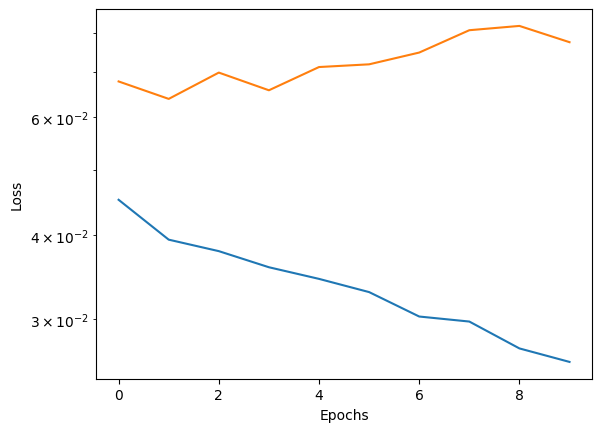

In [33]:
#show the loss curves and comment
plt.plot(prob_training_history.history["loss"], label="Training Loss")
plt.plot(prob_training_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log') #use log scale for the y axis


The plot shows a slight divergence between the training and validation loss curves, suggesting potential overfitting. While the training loss continues to decrease, the validation loss plateaus after a few epochs. To mitigate this, strategies like early stopping, regularization, or data augmentation could be considered. However, the extent of overfitting is not severe, and the model seems to be generalizing reasonably well.